In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets;
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import zero_one_loss

In [4]:
n_estimators = 400
learning_rate = 1 #this may bot be optimial for both algorithms compared here

X, y = datasets.make_hastie_10_2?

In [81]:
X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)
print X.shape
print y.shape

X_test, y_test = X[2000:], y[2000:]
X_train, y_train = X[:2000], y[:2000]

dt_stump =DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(X_train,y_train)
dt_stump_err = 1.0 - dt_stump.score(X_test,y_test) #this is just accuracy score
#real world may not use this score  (accuracy, f1_score etc..)

dt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1)
dt.fit(X_train,y_train)
dt_err = 1.0 - dt.score(X_test,y_test)

ada_discrete = AdaBoostClassifier(
    base_estimator=dt_stump,
    n_estimators= n_estimators,
    learning_rate = learning_rate,
    algorithm= "SAMME")
ada_discrete.fit(X_train,y_train)


ada_real = AdaBoostClassifier(
    base_estimator= dt_stump,
    n_estimators = n_estimators,
    learning_rate = learning_rate,
    algorithm = "SAMME.R")
ada_real.fit(X_train,y_train)

print zero_one_loss([1,2,4],[1,2,3])

ada_discrete_err = np.zeros((n_estimators,)) #init array with zero values
for i, y_pred in enumerate(ada_discrete.staged_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred,y_test)
    
ada_discrete_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_train)):
    ada_discrete_err_train[i] = zero_one_loss(y_pred,y_train)
    

ada_real_err = np.zeros((n_estimators,)) #init array with zero values
for i, y_pred in enumerate(ada_real.staged_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred,y_test)



ada_real_train_err = np.zeros((n_estimators,)) #init array with zero values
for i, y_pred in enumerate(ada_real.staged_predict(X_train)):
    ada_real_train_err[i] = zero_one_loss(y_pred,y_train)


(12000, 10)
(12000,)
0.333333333333


In [59]:
[1,2]*10

[1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2]

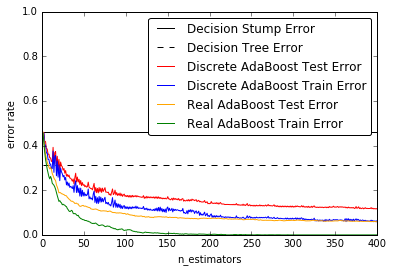

In [83]:
plt.plot([1,n_estimators],[dt_stump_err] * 2, "k-", label='Decision Stump Error')
plt.plot([1,n_estimators],[dt_err] * 2, "k--", label='Decision Tree Error')
plt.plot(np.arange(n_estimators)+1, ada_discrete_err, label = "Discrete AdaBoost Test Error", color="red")
plt.plot(np.arange(n_estimators)+1, ada_discrete_err_train, label = "Discrete AdaBoost Train Error", color="blue")
plt.plot(np.arange(n_estimators)+1, ada_real_err, label = "Real AdaBoost Test Error", color="orange")
plt.plot(np.arange(n_estimators)+1, ada_real_train_err, label = "Real AdaBoost Train Error", color="green")



plt.legend(loc="upper right", fancybox=True)
plt.ylim(0,1.0)
plt.xlabel("n_estimators")
plt.ylabel("error rate")
plt.show()